**Check GPU**

In [ ]:
!nvidia-smi

Tue Jan  9 16:43:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Install Ultralytics**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install --upgrade pip
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import torch # YOLOv7 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [ ]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 16.41 MiB/s, done.
Resolving deltas: 100% (519/519), done.
Updating files: 100% (108/108), done.


In [ ]:
!pwd

/content/drive/MyDrive/yolo


In [ ]:
cd yolov7

/content/drive/MyDrive/yolo/yolov7


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random
from IPython.display import Image

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

**Drive Mount**

**Creating Train-Val Split**

In [ ]:
trainImagePath = '/content/drive/MyDrive/yolo/data_pre/images/train/'
trainLabelPath = '/content/drive/MyDrive/yolo/data_pre/labels/train/'
valImagePath = '/content/drive/MyDrive/yolo/data_pre/images/val/'
valLabelPath = '/content/drive/MyDrive/yolo/data_pre/labels/val/'
testPath = '/content/drive/MyDrive/yolo/data_pre/test/'

**Split the dataset**

In [ ]:
def train_test_split(path,neg_path=None, split=0.2):
  print("-------- PROCESS STARTED ---------")

  files = list(set([name[:-4] for name in os.listdir(path)]))   ## Removing duplicate names data...

  print(f">>> This folder has a total number of {len(files)} images <<<")
  random.seed(42)
  random.shuffle(files)

  test_size = int(len(files) * split)
  train_size = len(files) - test_size

  ## Createing requird directories

  os.makedirs(trainImagePath, exist_ok= True)
  os.makedirs(trainLabelPath, exist_ok= True)
  os.makedirs(valImagePath, exist_ok= True)
  os.makedirs(valLabelPath, exist_ok= True)

  ## Copying images to train folder

  for filex in tqdm(files[:train_size]):
    if filex == 'classes':
      continue
    shutil.copy2(path + filex + '.jpg', f"{trainImagePath}/" + filex + '.jpg')
    shutil.copy2(path + filex + '.txt', f"{trainLabelPath}/" + filex + '.txt')

  print(f">>>> Training data created with 80% split {len(files[:train_size])} images <<<<")

  if neg_path:
    neg_images = list(set([name[:4] for name in os.listdir(neg_path)]))   ## Removing duplicate names data

    for filex in tqdm(neg_images):
      shutil.copy2(neg_path + filex + '.jpg', f"{trainImagePath}/" + filex + '.jpg')

    print(f">>>> Total {len(neg_images)} negative images added to the training data <<<<")
    print(f">>>> Total training data created with {len(files[:train_size]) + len(neg_images)} images <<<<")


  ## Copying images to validation folder

  for filex in tqdm(files[train_size:]):
    if filex == 'classes':
       continue

    shutil.copy2(path + filex + '.jpg', f"{valImagePath}/" + filex + '.jpg')
    shutil.copy2(path + filex + '.txt', f"{valLabelPath}/" + filex + '.txt')

  print(f">>>> Testing data created with 80% split {len(files[train_size:])} images <<<<")

  print(">>>> TASK COMPLETE <<<<")


### for label_tag
train_test_split('/content/drive/MyDrive/yolo/data/')    ## Without negative images

-------- PROCESS STARTED ---------
>>> This folder has a total number of 1238 images <<<


  0%|          | 0/991 [00:00<?, ?it/s]

>>>> Training data created with 80% split 991 images <<<<


  0%|          | 0/247 [00:00<?, ?it/s]

>>>> Testing data created with 80% split 247 images <<<<
>>>> TASK COMPLETE <<<<


**Create dataset.yaml file**

In [ ]:
%cd /content/drive/MyDrive/yolo/yolov7/data/

!touch dataset.yaml
!ls /content/drive/MyDrive/yolo/yolov7/data/

/content/drive/MyDrive/yolo/yolov7/data
coco.yaml     hyp.scratch.custom.yaml  hyp.scratch.p6.yaml
dataset.yaml  hyp.scratch.p5.yaml      hyp.scratch.tiny.yaml


In [ ]:
%cd /content/drive/MyDrive/yolo/yolov7

/content/drive/MyDrive/yolo/yolov7


**Train Detection model**

In [ ]:
!python train.py --device 0 --batch 16 --epochs 100 --img 640 640 --data '/content/drive/MyDrive/yolo/dataset.yaml' --cfg cfg/training/yolov7x.yaml --weights 'yolov7x.pt' --cache

2024-01-09 16:48:00.279239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 16:48:00.279286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 16:48:00.280587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 16:48:00.288243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 16:48:01.292421: W tensorflow/comp

**Checking all files inside the Train Folder**

In [ ]:
!ls /content/drive/MyDrive/yolo/yolov7/runs/train/exp

confusion_matrix.png				    results.txt		    train_batch2.jpg
events.out.tfevents.1704818885.e2eed04d045e.4493.0  test_batch0_labels.jpg  train_batch3.jpg
F1_curve.png					    test_batch0_pred.jpg    train_batch4.jpg
hyp.yaml					    test_batch1_labels.jpg  train_batch5.jpg
opt.yaml					    test_batch1_pred.jpg    train_batch6.jpg
P_curve.png					    test_batch2_labels.jpg  train_batch7.jpg
PR_curve.png					    test_batch2_pred.jpg    train_batch8.jpg
R_curve.png					    train_batch0.jpg	    train_batch9.jpg
results.png					    train_batch1.jpg	    weights


**Confusion Matrix**

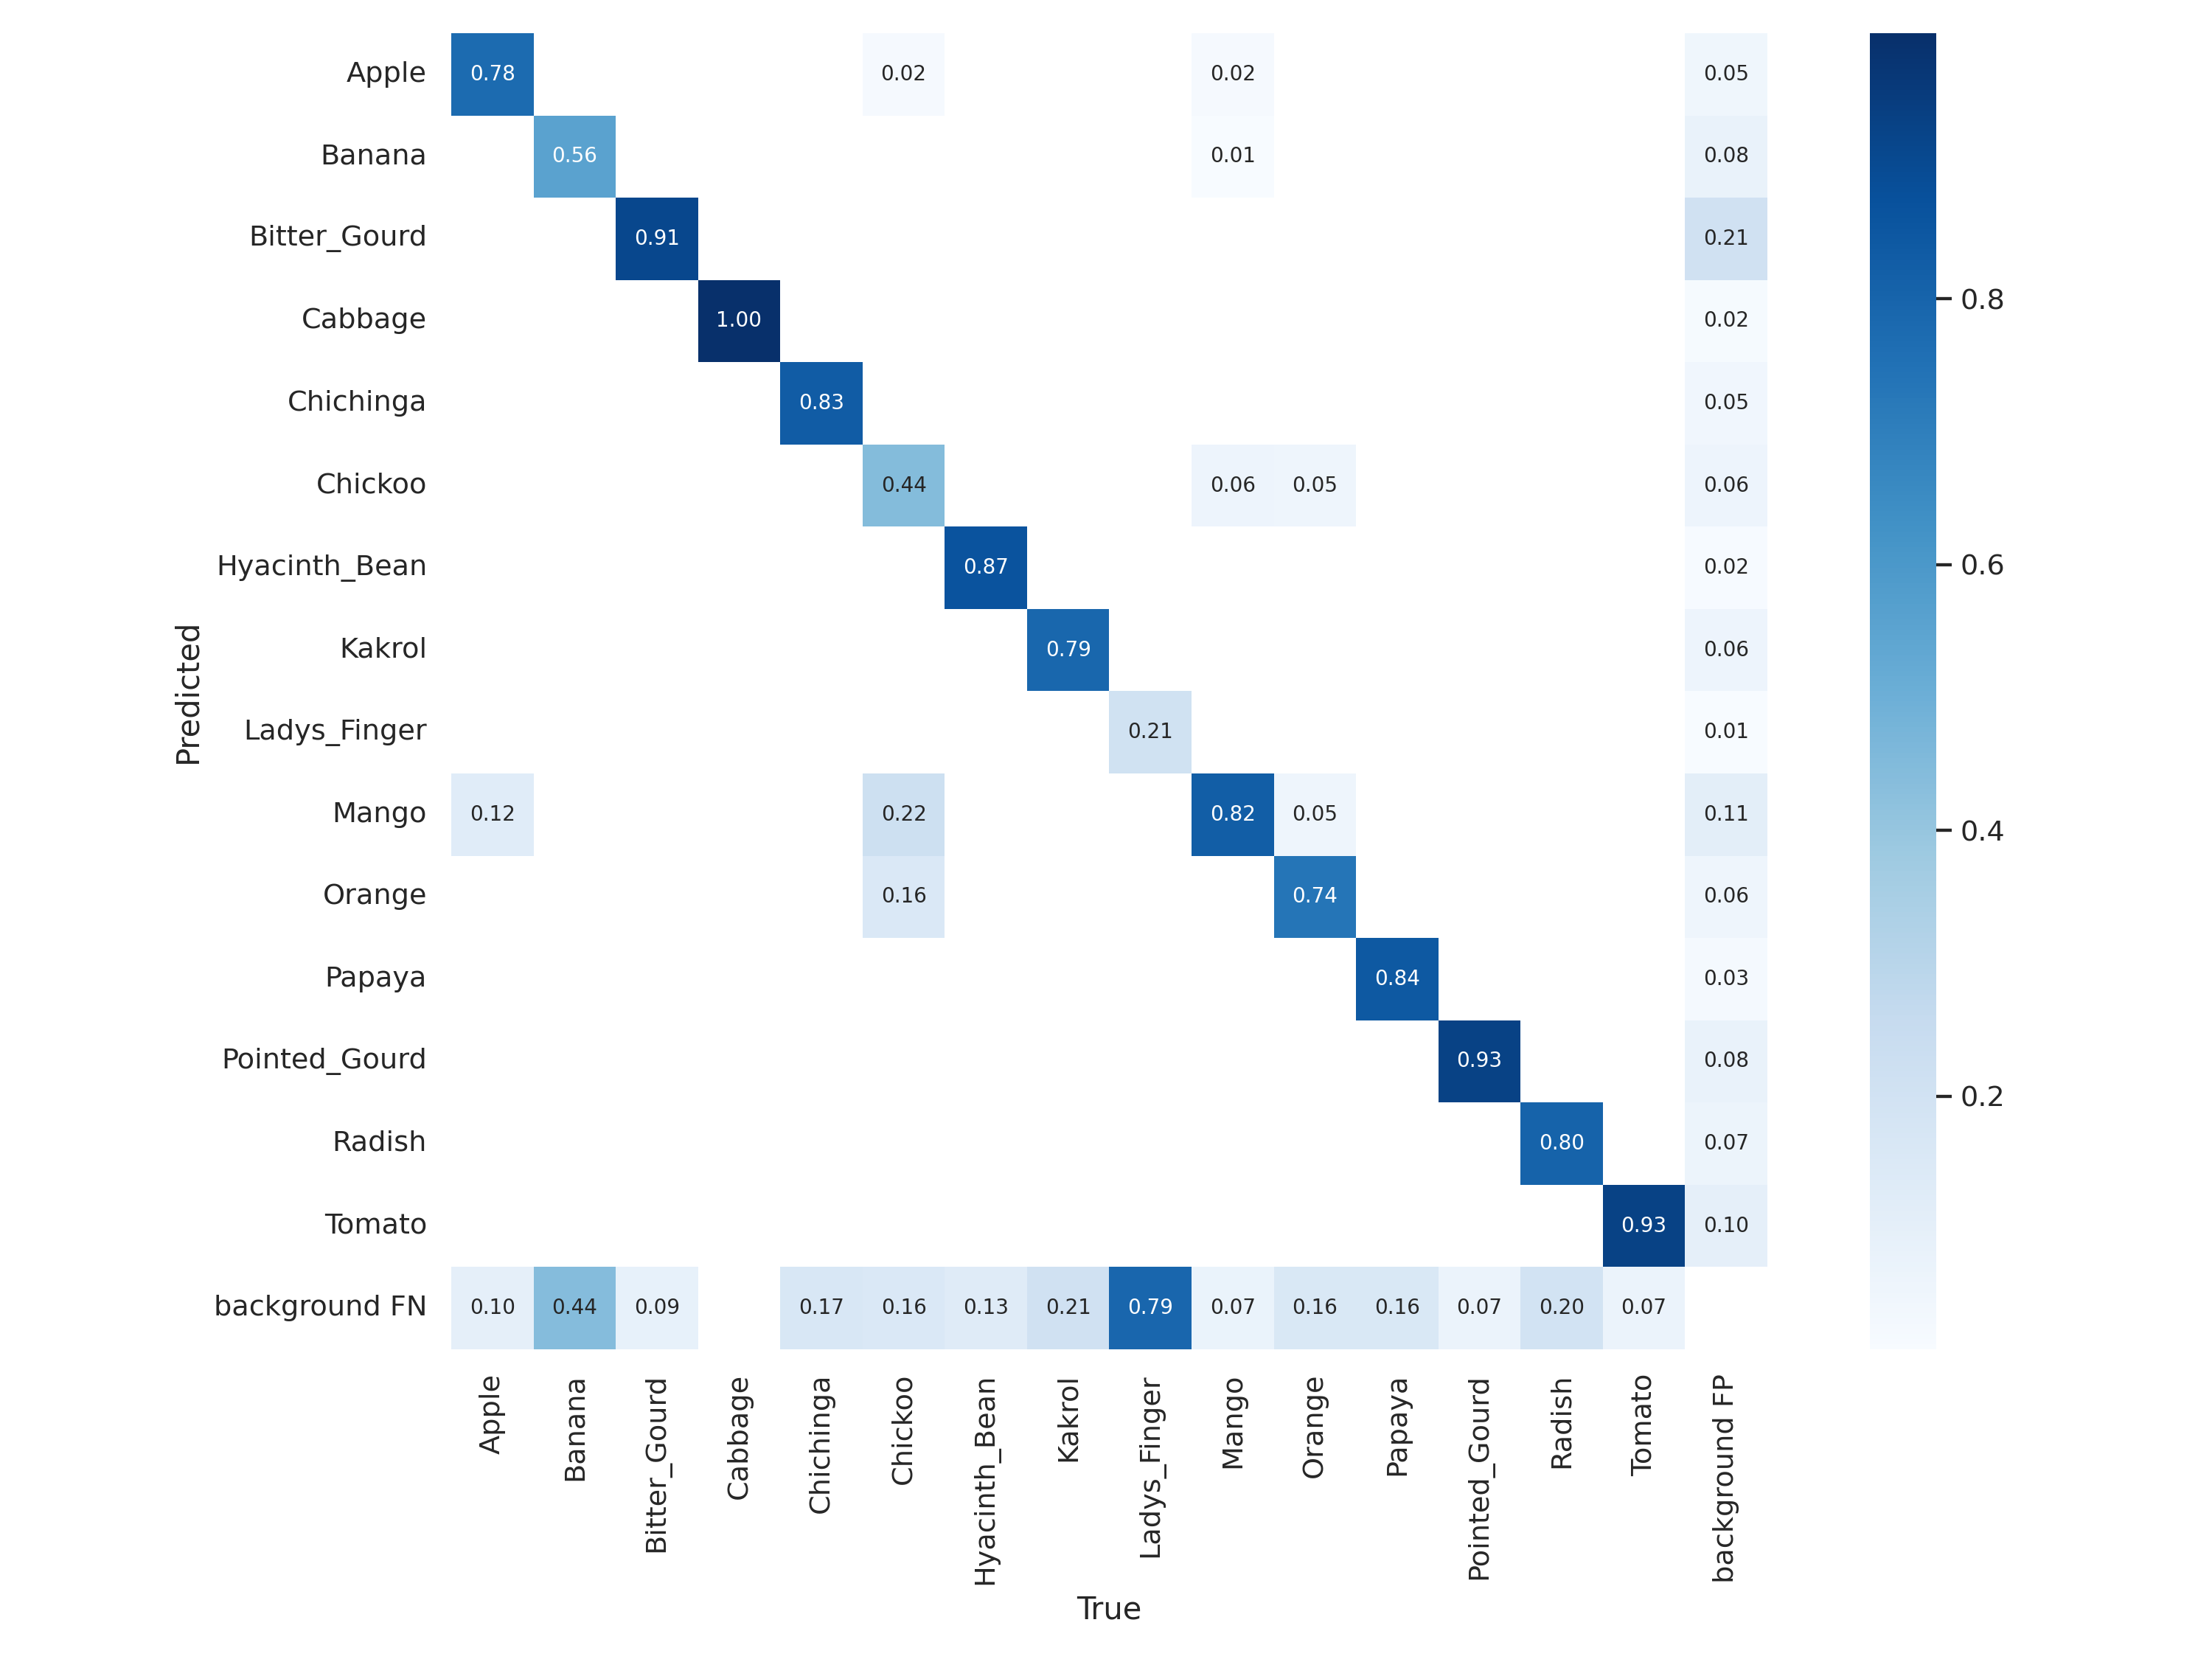

In [ ]:
Image(filename=f'/content/drive/MyDrive/yolo/yolov7/runs/train/exp/confusion_matrix.png', width=700)

**Results**

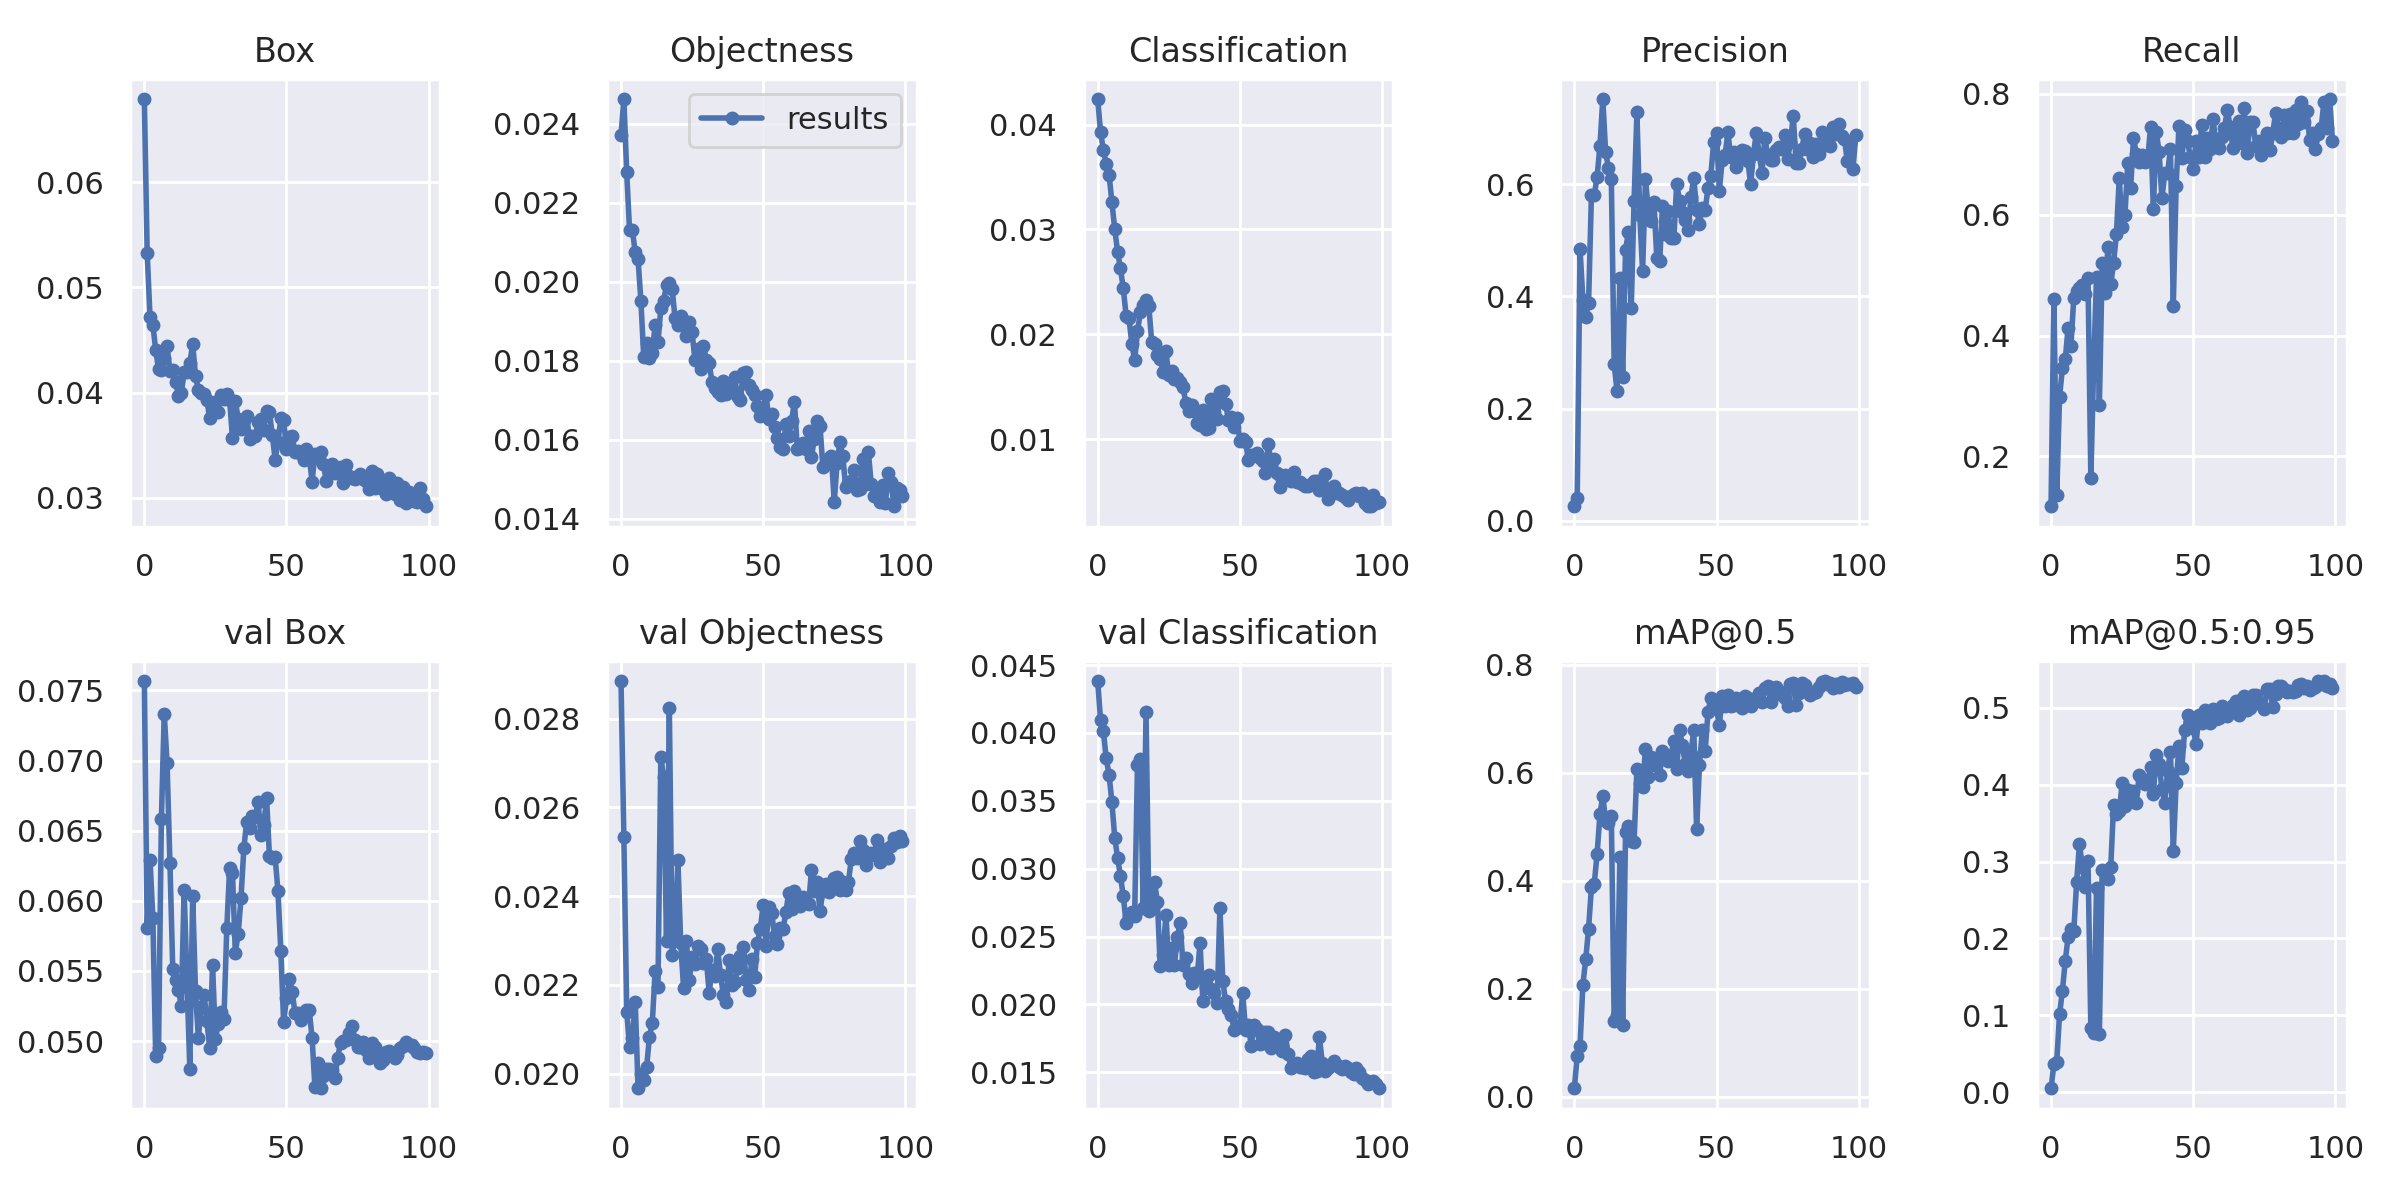

In [ ]:
Image(filename=f'/content/drive/MyDrive/yolo/yolov7/runs/train/exp/results.png', width=800)

In [2]:
%cd /content/drive/MyDrive/yolo/yolov7

/content/drive/MyDrive/yolo/yolov7


In [4]:
!python detect.py --weights /content/drive/MyDrive/yolo/yolov7/runs/train/exp/weights/best.pt --conf 0.1 --img-size 640 --source /content/drive/MyDrive/yolo/yolov7/unseen_test

Namespace(weights=['/content/drive/MyDrive/yolo/yolov7/runs/train/exp/weights/best.pt'], source='/content/drive/MyDrive/yolo/yolov7/unseen_test', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
IDetect.fuse
Model Summary: 362 layers, 70876776 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
7 Chickoos, Done. (34.7ms) Inference, (

**Validation Batch Prediction**